Observable Trends
- From all 4 treatments (drugs), Capomulin is the only one which achieves to reduce tumor volume and develops slower metastatic.
- In spite of Infubinol has bad results in terms of "Tumor Volume Changes", in "Metastatic sites" has a significant better performance than Ketapril and Pacebo.
- About "Survival Rate", again Capomulin has very good results compare to other treatments, in this case the worst rate has Infubinol, we can see a meaningful decrease in timepoint 35 (20% less!) 

In [420]:
# Dependencies
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pprint

In [421]:
# Read mice and drugs data
mouse_data = pd.read_csv("raw_data/mouse_drug_data.csv")
mouse_data.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [422]:
# Read clinical results
clinical_data = pd.read_csv("raw_data/clinicaltrial_data.csv")
clinical_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [423]:
 # Merge two dataframes using an inner join
clinical_table = pd.merge(clinical_data,mouse_data, on="Mouse ID")
#Filtering results as instructions requirements 
clinical_table = clinical_table.loc[clinical_table['Drug'].isin(['Capomulin','Infubinol','Ketapril','Placebo'])]
clinical_table.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [424]:
#Group by Drug and Timepoint, aggregation average by Tumor Volume 
tumor_analysis= clinical_table.groupby(["Drug","Timepoint"])['Tumor Volume (mm3)'].agg(['mean']).sort_index().reset_index()
tumor_analysis= tumor_analysis.rename(columns={"mean":"Tumor Volume (mm3)"})
tumor_analysis.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


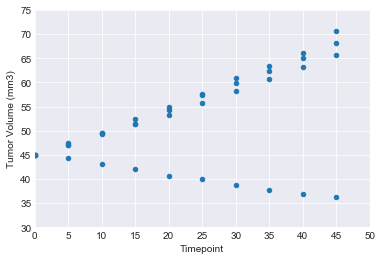

In [425]:
#A simple scatter plot with pandas and matplot
tumor_analysis.plot(kind="scatter", x="Timepoint", y="Tumor Volume (mm3)",legend=True)
plt.ylim(30, 75)
plt.xlim(0, 50)
plt.xticks(np.arange(0, 50+1, 5.0))
plt.show()

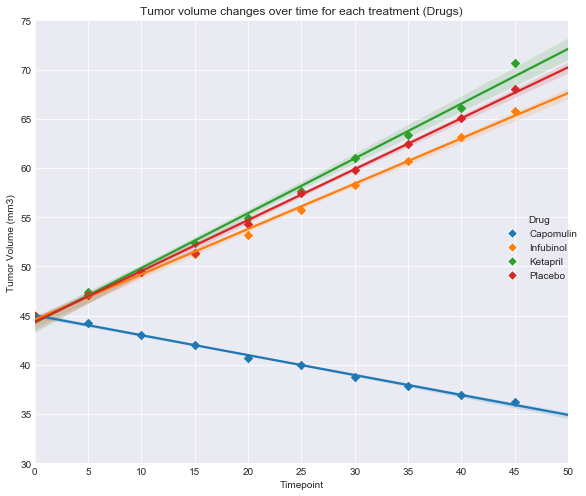

In [426]:
#Same scatter plot using SEABORN library

g = sns.FacetGrid(tumor_analysis, hue='Drug', margin_titles=True, size=7)

g.map(plt.scatter, 'Timepoint', 'Tumor Volume (mm3)', edgecolor="white", s=50, lw=1,marker="D").add_legend()
plt.ylim(30, 75)
plt.xlim(0, 50)
plt.xticks(np.arange(0, 50+1, 5.0))
g.ax.set_title('Tumor volume changes over time for each treatment (Drugs)')

g.map(sns.regplot, 'Timepoint', 'Tumor Volume (mm3)',marker="D");
sns.set_style("darkgrid")
plt.show()

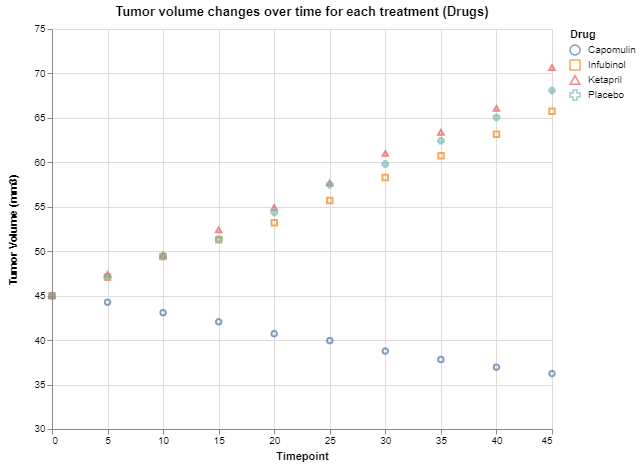

In [427]:
#Same scatter plot using ALTAIR AND VEGALITE library
#To run this results, it's necessary to install altair library and update jupyter-notebook
#Follow this steps: https://altair-viz.github.io/installation.html
#In Vega Editor contains tiptools for each value!
from vega3 import VegaLite

VegaLite({
    "title": "Tumor volume changes over time for each treatment (Drugs)",
    "mark": "point",
    "width": 500,
    "height": 400,
    "encoding": {
        "x": {"type": "quantitative","field": "Timepoint", "ticks":True},
        "y": {"type": "quantitative","field": "Tumor Volume (mm3)","scale": {"domain": [30,75]}, "ticks":True,
              "tooltip": {"field": "Tumor Volume (mm3)", "type": "quantitative"}},
        "color": {"field": "Drug", "type": "nominal"},
        "shape": {"field": "Drug", "type": "nominal"},
}
}, tumor_analysis)

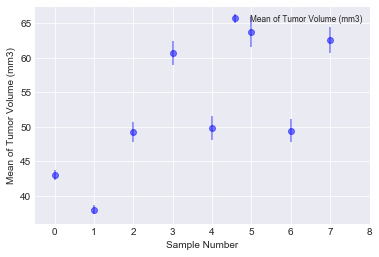

In [428]:
#Scatter plots, error bars
# Create a bunch of samples, each with div items(5)
div = 5
lim = len(tumor_analysis) // div
samples = [tumor_analysis.iloc[(i * div):(i * div + div), 2]
           for i in range(0, lim)]

# Calculate means
means = [s.mean() for s in samples]

# Calculate standard error on means
sem = [s.sem() for s in samples]

# Plot sample means with error bars
fig, ax = plt.subplots()

ax.errorbar(np.arange(0, len(means)), means, yerr=sem, fmt="o", color="b",
            alpha=0.5, label="Mean of Tumor Volume (mm3)")

ax.set_xlim(-0.5, len(means))

ax.set_xlabel("Sample Number")
ax.set_ylabel("Mean of Tumor Volume (mm3)")

plt.legend(loc="best", fontsize="small", fancybox=True)
plt.show()

In [429]:
#Group by Drug and Timepoint, aggregation average by Metastatic Sites
metastatic_analysis= clinical_table.groupby(["Drug","Timepoint"])['Metastatic Sites'].agg(['mean']).sort_index().reset_index()
metastatic_analysis= metastatic_analysis.rename(columns={"mean":"Metastatic Sites"})
metastatic_analysis.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


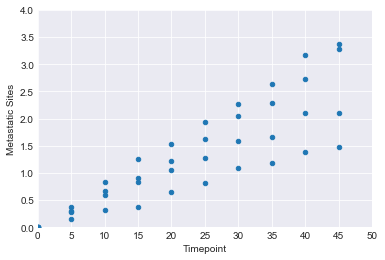

In [430]:
#A simple scatter plot with pandas and matplot
metastatic_analysis.plot(kind="scatter", x="Timepoint", y="Metastatic Sites",legend=True)
plt.ylim(0.0, 4.0)
plt.xlim(0, 50)
plt.xticks(np.arange(0, 50+1, 5.0))
plt.show()

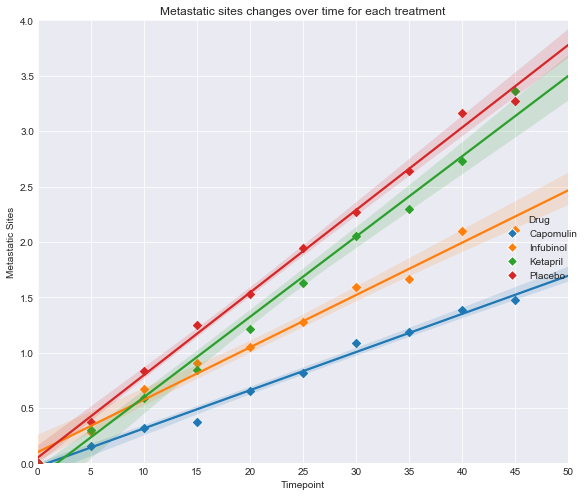

In [431]:
#Same scatter plot using SEABORN library

g = sns.FacetGrid(metastatic_analysis, hue='Drug', margin_titles=True, size=7)

g.map(plt.scatter, 'Timepoint', 'Metastatic Sites', edgecolor="white", s=50, lw=1,marker="D").add_legend()
plt.ylim(0.0, 4.0)
plt.xlim(0, 50)
plt.xticks(np.arange(0, 50+1, 5.0))
g.ax.set_title('Metastatic sites changes over time for each treatment')

g.map(sns.regplot, 'Timepoint', 'Metastatic Sites',marker="D");
sns.set_style("darkgrid")
plt.show()

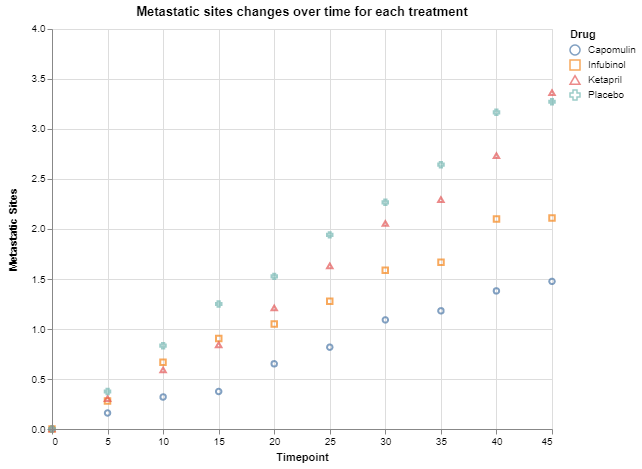

In [432]:
#Same scatter plot using ALTAIR AND VEGALITE library
#To run this results, it's necessary to install altair library and update jupyter-notebook
#Follow this steps: https://altair-viz.github.io/installation.html
#In Vega Editor contains tiptools for each value!

from vega3 import VegaLite

VegaLite({
    "title": "Metastatic sites changes over time for each treatment",
    "mark": "point",
    "width": 500,
    "height": 400,
    "encoding": {
        "x": {"type": "quantitative","field": "Timepoint", "ticks":True},
        "y": {"type": "quantitative","field": "Metastatic Sites","scale": {"domain": [0.0, 4.0]}, "ticks":True,
              "tooltip": {"field": "Metastatic Sites", "type": "quantitative"}},
        "color": {"field": "Drug", "type": "nominal"},
        "shape": {"field": "Drug", "type": "nominal"},
}
}, metastatic_analysis)

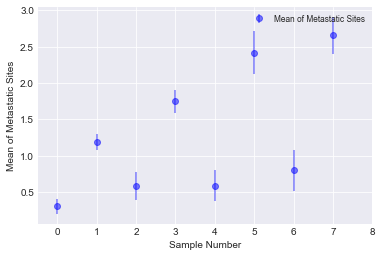

In [433]:
#Scatter plots, error bars
# Create a bunch of samples, each with div items
div = 5
lim = len(metastatic_analysis) // div
samples = [metastatic_analysis.iloc[(i * div):(i * div + div), 2]
           for i in range(0, lim)]

# Calculate means
means = [s.mean() for s in samples]

# Calculate standard error on means
sem = [s.sem() for s in samples]

# Plot sample means with error bars
fig, ax = plt.subplots()

ax.errorbar(np.arange(0, len(means)), means, yerr=sem, fmt="o", color="b",
            alpha=0.5, label="Mean of Metastatic Sites")

ax.set_xlim(-0.5, len(means))

ax.set_xlabel("Sample Number")
ax.set_ylabel("Mean of Metastatic Sites")

plt.legend(loc="best", fontsize="small", fancybox=True)
plt.show()

In [434]:
#Group by Drug and Timepoint, aggregation average by Mouse Count
mice_analysis= clinical_table.groupby(["Drug","Timepoint"])['Mouse ID'].agg(['count']).sort_index().reset_index()
mice_analysis= mice_analysis.rename(columns={"count":"Mouse Count"})
mice_analysis["Survival Rate"] = (mice_analysis["Mouse Count"]/25)*100 
mice_analysis.head()

,Drug,Timepoint,Mouse Count,Survival Rate
0,Capomulin,0,25,100.0
1,Capomulin,5,25,100.0
2,Capomulin,10,25,100.0
3,Capomulin,15,24,96.0
4,Capomulin,20,23,92.0


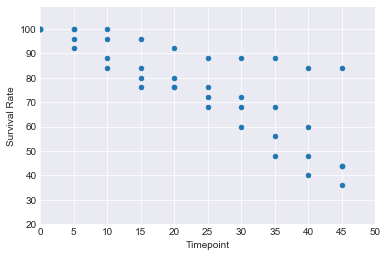

In [435]:
#A simple scatter plot with pandas and matplot
mice_analysis.plot(kind="scatter", x="Timepoint", y="Survival Rate",legend=True)
plt.ylim(20, 100.0+9)
plt.xlim(0, 50)
plt.xticks(np.arange(0, 50+1, 5.0))
plt.show()

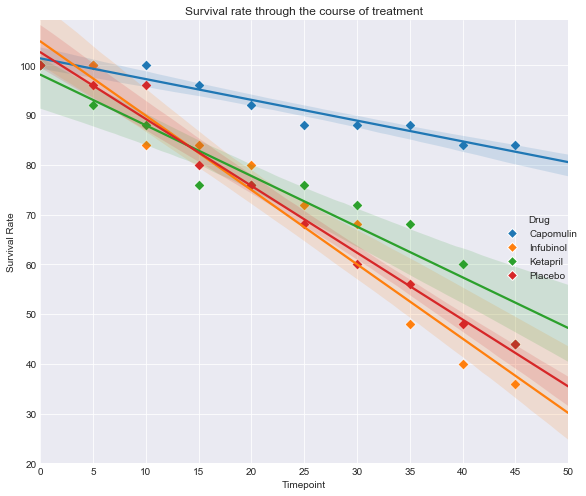

In [436]:
#Same scatter plot using SEABORN library
g = sns.FacetGrid(mice_analysis, hue='Drug', margin_titles=True, size=7)

g.map(plt.scatter, 'Timepoint', 'Survival Rate', edgecolor="white", s=50, lw=1,marker="D").add_legend()
plt.ylim(20, 100.0+9)
plt.xlim(0, 50)
plt.xticks(np.arange(0, 50+1, 5.0))
g.ax.set_title('Survival rate through the course of treatment')

g.map(sns.regplot, 'Timepoint', 'Survival Rate',marker="D");
sns.set_style("darkgrid")
plt.show()

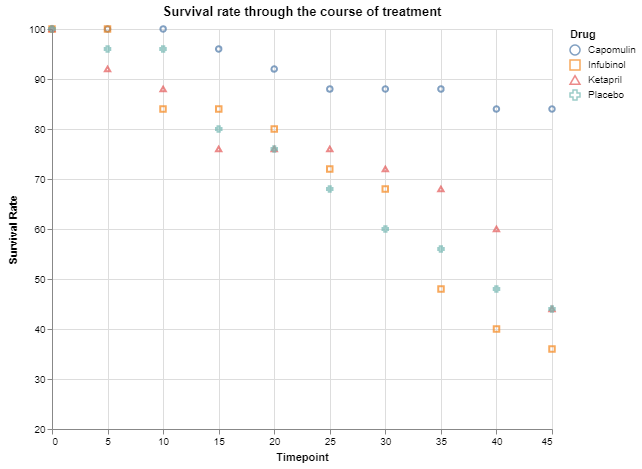

In [437]:
#Same scatter plot using ALTAIR AND VEGALITE library
#To run this results, it's necessary to install altair library and update jupyter-notebook
#Follow this steps: https://altair-viz.github.io/installation.html
#In Vega Editor contains tiptools for each value!

from vega3 import VegaLite

VegaLite({
    "title": "Survival rate through the course of treatment",
    "mark": "point",
    "width": 500,
    "height": 400,
    "encoding": {
        "x": {"type": "quantitative","field": "Timepoint", "ticks":True},
        "y": {"type": "quantitative","field": "Survival Rate","scale": {"domain": [20, 100.0]}, "ticks":True,
              "tooltip": {"field": "Survival Rate", "type": "quantitative"}},
        "color": {"field": "Drug", "type": "nominal"},
        "shape": {"field": "Drug", "type": "nominal"},
}
}, mice_analysis)

In [438]:
#Filter dataframe, timepoint = 45
tumor_analysis_evolution=tumor_analysis.loc[tumor_analysis['Timepoint'].isin(['45'])]
#Calculate Tumor Change
tumor_analysis_evolution["Tumor Change"] = ((tumor_analysis_evolution["Tumor Volume (mm3)"]-45) /45)*100
tumor_analysis_evolution

c:\anaconda\envs\pydata\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Drug,Timepoint,Tumor Volume (mm3),Tumor Change
9,Capomulin,45,36.236114,-19.475303
19,Infubinol,45,65.755562,46.123472
29,Ketapril,45,70.662958,57.028795
39,Placebo,45,68.084082,51.297960


c:\anaconda\envs\pydata\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


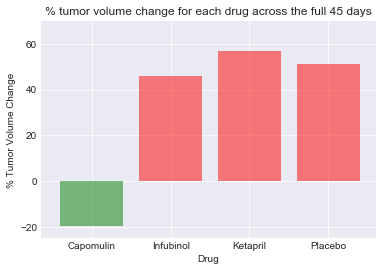

In [439]:
#Bar plot, using colors for positive and negative values
tumor_analysis_evolution['positive'] = tumor_analysis_evolution['Tumor Change'] > 0
tumor_analysis_evolution['positive']

x_axis = np.arange(len(tumor_analysis_evolution))

plt.bar(x_axis, tumor_analysis_evolution["Tumor Change"], color=tumor_analysis_evolution.positive.map({True: 'r', False: 'g'}), alpha=0.5, align="edge")
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, tumor_analysis_evolution["Drug"])

plt.xlim(-0.25, len(x_axis))
plt.ylim(-25, 70)

plt.title("% tumor volume change for each drug across the full 45 days")
plt.xlabel("Drug")
plt.ylabel("% Tumor Volume Change")

plt.show()